In [54]:
import numpy as np
import pandas as pd

import string
import collections
import re
 
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn

import matplotlib.pyplot as plt

import json
import jsonlines

from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

%matplotlib inline

c:\users\glosa\appdata\local\programs\python\python38-32\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
c:\users\glosa\appdata\local\programs\python\python38-32\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
c:\users\glosa\appdata\local\programs\python\python38-32\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
c:\users\glosa\appdata\local\programs\python\python38-32\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: i

In [18]:
df = pd.read_json('d://compling//python//fickle//genius-expertise//song_info.json', lines=True)

In [23]:
with open('d://compling//python//fickle//genius-expertise//lyrics.jl') as f:
    lines = f.read().splitlines()

In [24]:
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']

In [25]:
df_inter['json_element'].apply(json.loads)

0        {'song': 'Kendrick-lamar-swimming-pools-drank-...
1        {'song': 'Kendrick-lamar-money-trees-lyrics', ...
2        {'song': 'Kendrick-lamar-xxx-lyrics', 'lyrics'...
3        {'song': 'A-ap-rocky-fuckin-problems-lyrics', ...
4        {'song': 'Kendrick-lamar-dna-lyrics', 'lyrics'...
                               ...                        
37988    {'song': 'Pnl-tchiki-tchiki-lyrics', 'lyrics':...
37989    {'song': 'Pnl-chang-lyrics', 'lyrics': '

[Cou...
37990    {'song': 'Pnl-simba-lyrics', 'lyrics': '

[Int...
37991    {'song': 'Pnl-je-thaine-version-orange-lyrics'...
37992    {'song': 'Drake-and-michael-jackson-dont-matte...
Name: json_element, Length: 37993, dtype: object

In [26]:
df2 = pd.json_normalize(df_inter['json_element'].apply(json.loads))

In [29]:
df2

,url_name,lyrics
0,Kendrick-lamar-swimming-pools-drank-lyrics,\n\n[Produced by T-Minus]\n\n[Intro]\nPour up ...
1,Kendrick-lamar-money-trees-lyrics,\n\n[Produced by DJ Dahi]\n\n[Verse 1: Kendric...
2,Kendrick-lamar-xxx-lyrics,"\n\n[Intro: Bēkon & Kid Capri]\nAmerica, God b..."
3,A-ap-rocky-fuckin-problems-lyrics,"\n\n[Chorus: 2 Chainz, Drake & Both (A$AP Rock..."
4,Kendrick-lamar-dna-lyrics,"\n\n[Verse 1]\nI got, I got, I got, I got—\nLo..."
...,...,...
37988,Pnl-tchiki-tchiki-lyrics,"\n\n[Intro : N.O.S.]\nOuais, ouais, ouais, oua..."
37989,Pnl-chang-lyrics,"\n\n[Couplet 1 : Ademo]\nChang, chang, chang, ..."
37990,Pnl-simba-lyrics,"\n\n[Intro: N.O.S]\nOuais, Ah on va voir\nOuai..."
37991,Pnl-je-thaine-version-orange-lyrics,\n\n[Produit par BBP]\n\n[Couplet 1 : Ademo]\n...


In [28]:
df2.rename(columns={'song': 'url_name', 'lyrics': 'lyrics'}, inplace=True)

In [30]:
df3 = df.merge(df2)

In [31]:
df3

,url_name,title,primary_artist,release_date,pyongs,contributors,has_bio,views,tags,annotations,lyrics
0,Kendrick-lamar-swimming-pools-drank-lyrics,Swimming Pools (Drank),Kendrick-lamar,"July 31, 2012",894.0,403,True,5589280.0,"[Trap, Conscious Hip-Hop, Memes, West Coast, R...",NaN,\n\n[Produced by T-Minus]\n\n[Intro]\nPour up ...
1,Kendrick-lamar-money-trees-lyrics,Money Trees,Kendrick-lamar,"October 22, 2012",880.0,394,True,4592003.0,"[Conscious Hip-Hop, West Coast, Rap, Producer]",NaN,\n\n[Produced by DJ Dahi]\n\n[Verse 1: Kendric...
2,Kendrick-lamar-xxx-lyrics,XXX.,Kendrick-lamar,"April 14, 2017",188.0,389,True,4651514.0,"[Conscious Hip-Hop, Boom Bap, Pop, West Coast,...",NaN,"\n\n[Intro: Bēkon & Kid Capri]\nAmerica, God b..."
3,A-ap-rocky-fuckin-problems-lyrics,Fuckin’ Problems,A-ap-rocky,"October 24, 2012",706.0,437,True,7378309.0,"[Gangsta Rap, Dirty South, Atlanta, Posse Cut,...",NaN,"\n\n[Chorus: 2 Chainz, Drake & Both (A$AP Rock..."
4,Kendrick-lamar-dna-lyrics,DNA.,Kendrick-lamar,"April 14, 2017",555.0,570,True,5113687.0,"[Politics, Producer, News, Conscious Hip-Hop, ...",NaN,"\n\n[Verse 1]\nI got, I got, I got, I got—\nLo..."
...,...,...,...,...,...,...,...,...,...,...,...
37902,Kaaris-mbm-lyrics,MBM,Kaaris,"October 21, 2013",5.0,32,True,79801.0,"[France, Rap, French Rap]",NaN,\n\n[Intro]\n2.7\n2.7\nOrh Click\nKaaris\nBack...
37903,Kaaris-pablito-lyrics,Pablito,Kaaris,"March 3, 2014",27.0,31,True,78467.0,"[France, Rap, French Rap]",NaN,\n\n[Couplet 1]\nLa came doit servir à remplir...
37904,Kaaris-a-lheure-lyrics,À l’heure,Kaaris,"February 24, 2014",31.0,38,True,79215.0,"[France, Rap, French Rap]",NaN,"\n\n[Couplet 1]\nJ'suis locataire, Dieu est le..."
37905,Kaaris-zone-de-transit-lyrics,Zone de transit,Kaaris,"March 30, 2015",14.0,37,True,71675.0,"[France, French Rap, Rap]",NaN,\n\n[Couplet 1]\nJ'suis plus dans la Lamborghi...


In [56]:
df4 = df3.head(1000)

In [57]:
def lemmatize(x):
    if type(x) != str:
        return ""
    text = wordpunct_tokenize(x)
    result = []
    for word in text:
        if word.isalpha():
            nf = morph.parse(word)[0].normal_form
            result.append(nf)
    return " ".join(result)

songs_preprocessed = list(df4['lyrics'].apply(lemmatize).values)

In [59]:
df4['preprocessed_songs'] = songs_preprocessed

C:\Users\glosa\AppData\Local\Temp/ipykernel_3512/1870530476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['preprocessed_songs'] = songs_preprocessed


In [60]:
df4

,url_name,title,primary_artist,release_date,pyongs,contributors,has_bio,views,tags,annotations,lyrics,preprocessed_songs
0,Kendrick-lamar-swimming-pools-drank-lyrics,Swimming Pools (Drank),Kendrick-lamar,"July 31, 2012",894.0,403,True,5589280.0,"[Trap, Conscious Hip-Hop, Memes, West Coast, R...",NaN,\n\n[Produced by T-Minus]\n\n[Intro]\nPour up ...,produced by t minus intro pour up drank head s...
1,Kendrick-lamar-money-trees-lyrics,Money Trees,Kendrick-lamar,"October 22, 2012",880.0,394,True,4592003.0,"[Conscious Hip-Hop, West Coast, Rap, Producer]",NaN,\n\n[Produced by DJ Dahi]\n\n[Verse 1: Kendric...,produced by dj dahi verse kendrick lamar uh me...
2,Kendrick-lamar-xxx-lyrics,XXX.,Kendrick-lamar,"April 14, 2017",188.0,389,True,4651514.0,"[Conscious Hip-Hop, Boom Bap, Pop, West Coast,...",NaN,"\n\n[Intro: Bēkon & Kid Capri]\nAmerica, God b...",intro bēkon kid capri america god bless you if...
3,A-ap-rocky-fuckin-problems-lyrics,Fuckin’ Problems,A-ap-rocky,"October 24, 2012",706.0,437,True,7378309.0,"[Gangsta Rap, Dirty South, Atlanta, Posse Cut,...",NaN,"\n\n[Chorus: 2 Chainz, Drake & Both (A$AP Rock...",chorus chainz drake both a ap rocky i love bad...
4,Kendrick-lamar-dna-lyrics,DNA.,Kendrick-lamar,"April 14, 2017",555.0,570,True,5113687.0,"[Politics, Producer, News, Conscious Hip-Hop, ...",NaN,"\n\n[Verse 1]\nI got, I got, I got, I got—\nLo...",verse i got i got i got i got loyalty got roya...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Eminem-freestyle-gone-crazy-lyrics,Freestyle gone crazy,Eminem,2000,1.0,21,True,13824.0,[Rap],NaN,"\n\nDie Bitches, Check it out bitches\nAll you...",die bitches check it out bitches all you bitch...
996,Royce-da-59-rap-on-steroids-lyrics,Rap on Steroids,Royce-da-59,"March 29, 2016",12.0,37,True,13938.0,"[East Coast, Rap]",NaN,"\n\n[Intro: Jahlil Beats]\nJahlil beats, holla...",intro jahlil beats jahlil beats holla at me ve...
997,Bizarre-and-kuniva-murder-lyrics,Murder,Bizarre-and-kuniva,"December 4, 2006",2.0,21,True,13818.0,[Rap],NaN,"\n\n[Intro: Bizarre]\nDetroit, Motown\nHey, gu...",intro bizarre detroit motown hey guess what th...
998,Obie-trice-got-some-teeth-lyrics,Got Some Teeth,Obie-trice,"August 12, 2003",5.0,25,True,13722.0,[Rap],NaN,\n\nWoo!\nDamn\nThere's a lot of bitches up in...,woo damn there s a lot of bitches up in here t...


In [113]:
dataset = df4

In [114]:
stops = stopwords.words("english")
tfidf = TfidfVectorizer(
    max_features=1000,
    min_df=5,
    analyzer="word",
    stop_words=stops
)

In [115]:
dataset.keys()

Index(['url_name', 'title', 'primary_artist', 'release_date', 'pyongs',
       'contributors', 'has_bio', 'views', 'tags', 'annotations', 'lyrics',
       'preprocessed_songs'],
      dtype='object')

In [116]:
X = tfidf.fit_transform(dataset['preprocessed_songs']).todense()


new_cols=tfidf.get_feature_names_out()

print(X.shape)

(1000, 1000)


In [120]:
df_new = pd.DataFrame(X, columns=new_cols)

In [121]:
df_new

,ab,across,act,actin,actually,additional,afraid,aftermath,ah,ahead,...,yah,yeah,year,years,yellow,yes,yet,yo,york,young
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.008873,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.020356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.192733,0.000000,0.000000,0.0,0.023142,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.132133,0.000000,0.048039,0.0,0.000000,0.0,0.000000,0.0,0.042853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.093726,0.0,0.000000
996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.053659,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.051637,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.020607,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [122]:
distortions = []
cluster_range = range(1, 10)
for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(X)
    distortions.append(model.inertia_)

c:\users\glosa\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\glosa\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\glosa\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/

Text(0, 0.5, 'Сумма квадратов расстояний')

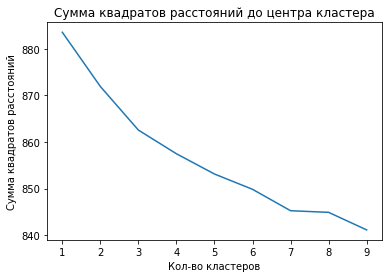

In [123]:
sns.lineplot(x=cluster_range, y=distortions)
plt.title("Сумма квадратов расстояний до центра кластера")
plt.xlabel("Кол-во кластеров")
plt.ylabel("Сумма квадратов расстояний")

In [124]:
model = KMeans(n_clusters=5, random_state=1)

In [125]:
model.fit(X)

c:\users\glosa\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [126]:
def clusters_stats(clusters):
    
    # делаем копию датасета и сохраняем метки кластеров туда
    data_with_labels = X.copy()
    data_with_labels["cluster"] = clusters
    
    # смотрим сочетания меток видов и кластеров
    data_with_labels["i"] = 1
    print(data_with_labels.pivot_table(index="label", columns="cluster", values="i", aggfunc="sum").fillna(""))
    print("-" * 50)


In [128]:
clusters = model.predict(X)

c:\users\glosa\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [129]:
clusters_stats(clusters)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices